In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
import keras_tuner as kt
from tensorflow import keras
import math

In [ ]:
# Load the data
train = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-nov-2021/test.csv")

In [ ]:
train.head()

In [ ]:
sample_train = train.sample(frac=0.5, random_state=42)

In [ ]:
validation_set = train.sample(frac=0.05, random_state=12)

In [ ]:
sample_train.shape

In [ ]:
sample_train = sample_train.astype('float')

# **Baseline**

In [ ]:
# Visualise the classes
sns.countplot(data=sample_train, x='target')
plt.show()

In [ ]:
# Split the data into train and test
X = sample_train.drop(['id', 'target'], axis=1)
y = sample_train['target']

X_validation = validation_set.drop(['id', 'target'], axis=1)
y_validation = validation_set['target']

# Scale the training data
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_valid_scaled = mms.transform(X_validation)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_val, y_val, y_val = train_test_split(X_valid_scaled, y_validation, test_size=0.2, random_state=42)

In [ ]:
X = sample_train.drop(['id', 'target'], axis=1)
y = sample_train['target']

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

In [ ]:
# Build models
def build_models(X_train, X_test, y_train, y_test):
    
    # 1. Logistic Regression
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_lr = lr.predict_proba(X_train)
    test_predictions_lr = lr.predict_proba(X_test)

    train_roc_lr = roc_auc_score(y_train, train_predictions_lr[ : , 1])
    test_roc_lr = roc_auc_score(y_test, test_predictions_lr[ : , 1])
    
    print("Logistic Regression Model built")
    
    # 3. Decision Tree Classifier
    dt_clf = DecisionTreeClassifier()
    
    # Fit on trainset
    dt_clf.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_dt = dt_clf.predict_proba(X_train)
    test_predictions_dt = dt_clf.predict_proba(X_test)
    
    train_roc_dt = roc_auc_score(y_train, train_predictions_dt[ : , 1])
    test_roc_dt = roc_auc_score(y_test, test_predictions_dt[ : , 1])
          
    print("Deicision Tree Model built")
    
    # 4. Random Forest
    rf_clf = RandomForestClassifier()
    
    # Fit on trainset
    rf_clf.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_rf = rf_clf.predict_proba(X_train)
    test_predictions_rf = rf_clf.predict_proba(X_test)
    
    train_roc_rf = roc_auc_score(y_train, train_predictions_rf[ : , 1])
    test_roc_rf = roc_auc_score(y_test, test_predictions_rf[ : , 1])
    
    print("Random Forest Model built")
          
    # 5. Extra Classifier
    ext_clf = ExtraTreesClassifier()
    
    # Fit on trainset
    ext_clf.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_ext = ext_clf.predict_proba(X_train)
    test_predictions_ext = ext_clf.predict_proba(X_test)
    
    train_roc_ext = roc_auc_score(y_train, train_predictions_ext[ : , 1])
    test_roc_ext = roc_auc_score(y_test, test_predictions_ext[ : , 1])
          
    print("Extra Trees Model built")
    
    # 6. XGBoost
    xgb_clf = XGBClassifier()
    
    # Fit on trainset
    xgb_clf.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_xgb = xgb_clf.predict_proba(X_train)
    test_predictions_xgb = xgb_clf.predict_proba(X_test)
    
    train_roc_xgb = roc_auc_score(y_train, train_predictions_xgb[ : , 1])
    test_roc_xgb = roc_auc_score(y_test, test_predictions_xgb[ : , 1])
    
    print("XGBoost Model built")
    
    # 7. LGBM
    lgbm_clf = LGBMClassifier()
    
    # Fit on trainset
    lgbm_clf.fit(X_train, y_train)
    
    # Make Predictions
    train_predictions_lgbm = lgbm_clf.predict_proba(X_train)
    test_predictions_lgbm = lgbm_clf.predict_proba(X_test)
    
    train_roc_lgbm = roc_auc_score(y_train, train_predictions_lgbm[ : , 1])
    test_roc_lgbm = roc_auc_score(y_test, test_predictions_lgbm[ : , 1])
    
    print("Light GBM Model built")
    
    # Concatenate the train results
    results_train_arr = np.array([train_roc_lr, 
                                        train_roc_dt, 
                                        train_roc_rf,  
                                        train_roc_ext,
                                        train_roc_xgb,
                                        train_roc_lgbm])
    
    # Concatenate the test results
    results_test_arr = np.array([test_roc_lr, 
                                        test_roc_dt, 
                                        test_roc_rf,  
                                        test_roc_ext,
                                        test_roc_xgb,
                                        test_roc_lgbm])
    # Concatenate the total results
    final_results = np.concatenate((results_train_arr.reshape(-1,1), results_test_arr.reshape(-1,1)), axis=1)
    
    return final_results

In [ ]:
# Call the function
baseline_results = build_models(X_train, X_test, y_train, y_test)

In [ ]:
baseline_results_df = pd.DataFrame(baseline_results, 
                                   columns = ['Train_ROC', 'Test_ROC'], 
                                   index=['LR', 'DT', 'RF', 'EXT', 'XGB', 'LGBM'])

In [ ]:
baseline_results_df

**Logistic Regression Generalises well**

In [ ]:
# Build the model again and plot the confusion matrix
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

# Make Predictions
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

cnf_matrix_train = confusion_matrix(y_train, train_predictions, normalize='all')
cnf_matrix_test = confusion_matrix(y_test, test_predictions, normalize='all')

figure, ax = plt.subplots(1, 2, figsize=(20,8))
sns.heatmap(cnf_matrix_train, annot=True, ax=ax[0], fmt='.3g')
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")


sns.heatmap(cnf_matrix_test, annot=True, ax=ax[1], fmt='.3g')
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
figure.show()


In [ ]:
sns.countplot(data=sample_train, x='target')
plt.show()

In [ ]:
# Hyperparameter Tuning
logistic_regression_params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                              'tol' : [1e-4, 1e-2, 1e-1],
                              'C' : [0.25, 0.50, 1.0, 1.5, 2.0],
                              'class_weight': ['balanced'],
                              'solver' : ['saga', 'liblinear'],
                              'max_iter' : [10, 50, 100, 150, 200, 500, 1000]}

lr_clf_2 = LogisticRegression(verbose=5)
rscv_lr = RandomizedSearchCV(lr_clf_2, logistic_regression_params, n_iter=100, cv=3, verbose=3, scoring='roc_auc', random_state=42, n_jobs=-1)
rscv_lr.fit(X_train, y_train)

In [ ]:
cv_results = [(rscv_lr.cv_results_['split{}_test_score'.format(i)]) for i in range(0,3)]
mean_results = []
for result in cv_results:
    mean_roc_auc = np.mean([val for val in result if not math.isnan(val)])
    mean_results.append(mean_roc_auc)

In [ ]:
mean_results

In [ ]:
# Plot the results of best estimator
lr_best_estimator = rscv_lr.best_estimator_


train_predictions_lr = lr_best_estimator.predict_proba(X_train)
test_predictions_lr = lr_best_estimator.predict_proba(X_test)

train_roc_lr = roc_auc_score(y_train, train_predictions_lr[ : , 1])
test_roc_lr = roc_auc_score(y_test, test_predictions_lr[ : , 1])

In [ ]:
train_roc_lr, test_roc_lr

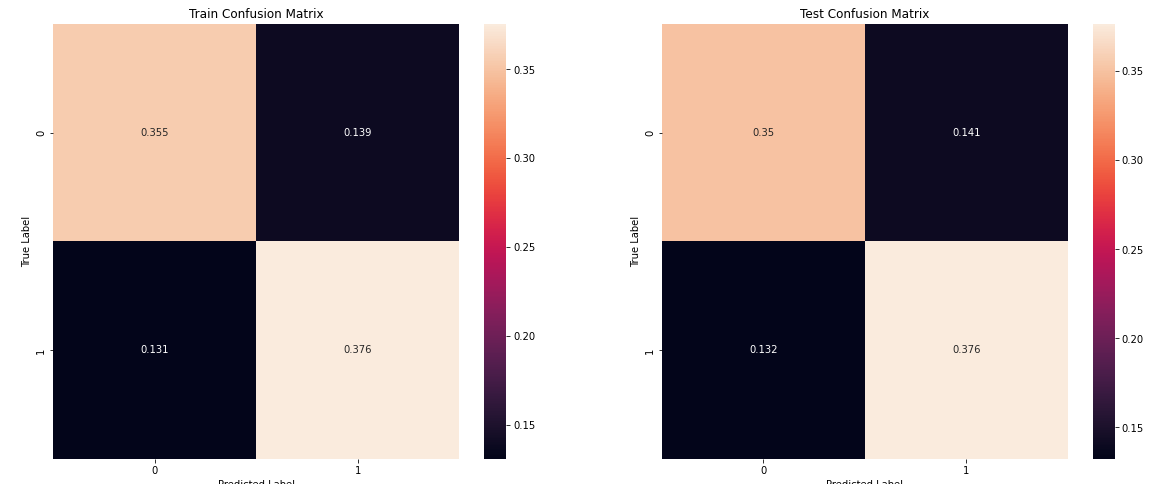

In [ ]:
train.shape

In [ ]:
# Train the best extimator on the entire dataset
X_entire = train.drop(['id', 'target'], axis=1)
y_entire = train['target']

lr_best_estimator.fit(X_entire, y_entire)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_entire, y_entire)

In [ ]:
test_scaled = mms.transform(test.drop(['id'], axis=1))

In [ ]:
lr_predictions = lr.predict(test_scaled)
lr_submission_arr = np.concatenate((test.id.values.reshape(-1,1), lr_predictions.reshape(-1,1)), axis=1)
lr_submission_df = pd.DataFrame(lr_submission_arr, columns = ['id', 'target'])
lr_submission_df.to_csv('./lr_submissions_2.csv', index=False)